In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df=pd.read_csv('income.csv')

In [39]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


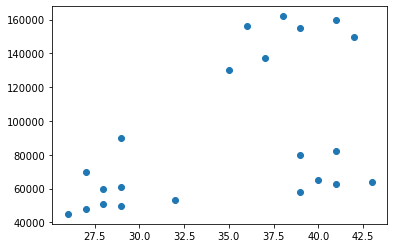

In [40]:
plt.scatter(df['Age'],df['Income($)'])

In [41]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [42]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [43]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [44]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


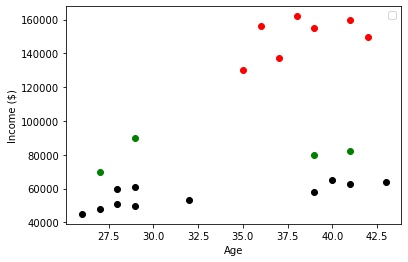

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
# plt.scatter(km.cluster_cent ers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [46]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']]=scaler.transform(df[['Income($)']])
df

# age
scaler.fit(df[['Age']])
df[['Age']]=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [52]:
# chek again the cluster is set properly or not
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [53]:
y_predicted


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [58]:
df['cluster']=y_predicted
df.drop('clsuter',axis='columns',inplace=True)


In [59]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [62]:
# for centroids
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

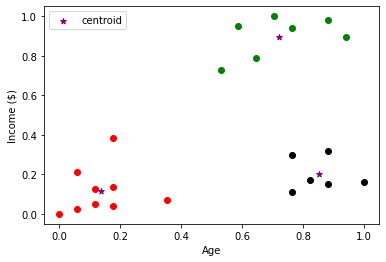

In [63]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [64]:
# for elbow Techniques
k_range=range(1,10)
sse=[]
# sum of square error(SSE)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
#     insertia_ gives the sse
    

In [65]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21066678488010523,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620906]

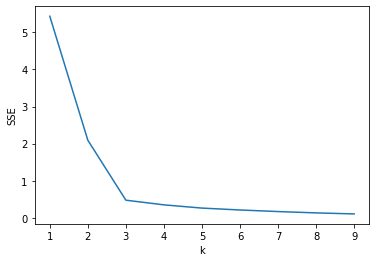

In [67]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range,sse)

In [ ]:
# now look at the above plot we take cluster as 3 which is named as Elbow